Data preprocesing


In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/spam.tsv',sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
df['label'].value_counts() / (len(df))*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [17]:
ham = df[df['label'] == 'ham']

In [18]:
ham

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [19]:
spam = df[df['label'] == 'spam']

In [20]:
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [21]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [22]:
ham = ham.sample(spam.shape[0])

In [23]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [24]:
data = ham.append(spam,ignore_index=True)

<ipython-input-24-61984e723acc>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam,ignore_index=True)


In [25]:
data.shape

(1494, 4)

In [26]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

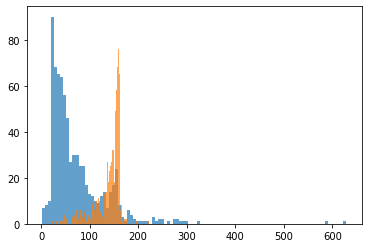

In [32]:
plt.hist(data[data['label'] == 'ham']['length'], bins =100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins =100, alpha = 0.7)
plt.show()

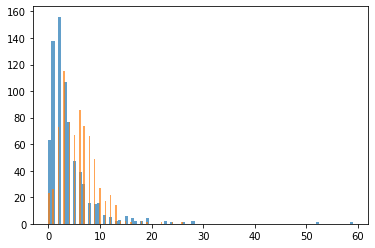

In [33]:
plt.hist(data[data['label'] == 'ham']['punct'], bins =100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins =100, alpha = 0.7)
plt.show()

In [34]:
#there is no much difference in ham and spam, but with the lenghts we can see that most of the longer (in length) messages are classified as spam

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size = 0.3,random_state=0,shuffle = True)

In [38]:
X_train.shape

(1045,)

In [40]:
1494*0.7

1045.8

In [41]:
X_test.shape

(449,)

In [42]:
1494*0.3

448.2

Building Random Forest

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [46]:
classifier = Pipeline([("tfidf",TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators=100))])

In [47]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [48]:
y_perd = classifier.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [51]:
accuracy_score(y_test,y_perd)

0.9443207126948775

In [52]:
0.9443207126948775 * 449

424.0

In [53]:
#this means out of 449 records we got 424 as correct prediciton

In [54]:
confusion_matrix(y_test,y_perd)

array([[224,   3],
       [ 22, 200]])

In [55]:
print(classification_report(y_test,y_perd))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



Building SVM

In [57]:
from sklearn.svm import SVC

In [58]:
svm = Pipeline([("tfidf",TfidfVectorizer()), ("classifier", SVC(C = 100, gamma = 'auto'))])

In [59]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [60]:
y_pred = svm.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [65]:
0.9487750556792873*449

426.0

In [62]:
confusion_matrix(y_test,y_pred)

array([[219,   8],
       [ 15, 207]])

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.96      0.95       227
        spam       0.96      0.93      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

